<a href="https://colab.research.google.com/github/Nithyasreecp/IMAGE-PROCESSING/blob/main/image_degradation_and_restoratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hydu mund.jpg to hydu mund (4).jpg


In [ ]:

# Read the image
img = cv2.imread('/content/hydu mund (1).jpg')  # replace with your image file name


In [ ]:
# Convert BGR to RGB (OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


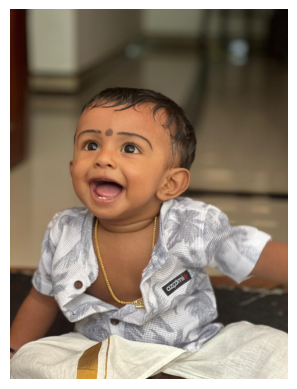

In [ ]:

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # hide axis
plt.show()

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


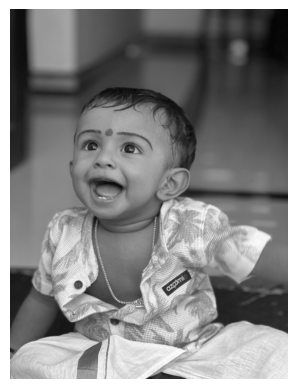

In [ ]:
# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

This line creates random noise, which is added to the image to degrade it —
so you can later apply restoration techniques (like inverse filtering, Wiener, or CLS) to remove that noise or blur.

In [ ]:
# Generate random noise
noise = np.random.randint(0, 50, img.shape, dtype='uint8')  # random values between 0–50


In [ ]:
# Add noise to image
noisy_img = cv2.add(img, noise)


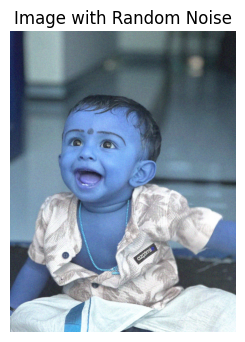

In [ ]:
plt.subplot(1,2,2)
plt.title("Image with Random Noise")
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')

plt.show()

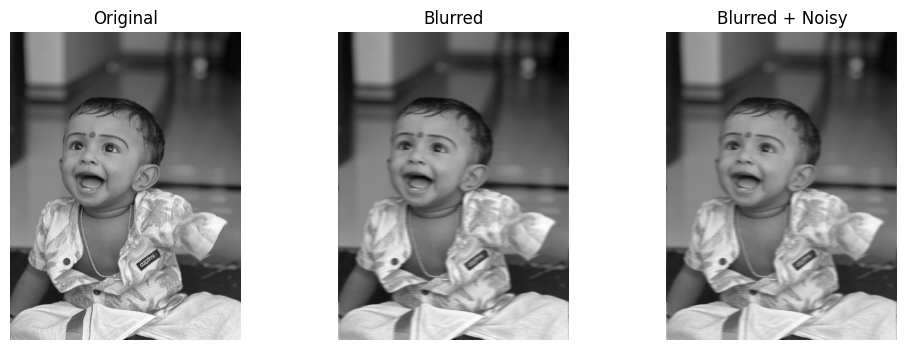

In [ ]:
from scipy.signal import convolve2d
from scipy.fft import fft2, ifft2, fftshift
# Imports convolution and Fourier transform functions for blurring and restoration

# Read grayscale image
img = cv2.imread('/content/hydu mund (2).jpg', cv2.IMREAD_GRAYSCALE)
img = img.astype(float) / 255.0  # normalize

# Create motion blur kernel (PSF)for Testing Image Restoration Algorithms
def motion_blur_psf(length=15):

  #Creates a square matrix filled with zeros (size 15×15).
    psf = np.zeros((length, length))

    #Sets the middle row to all ones.
    psf[int(length/2), :] = np.ones(length)
    psf = psf / psf.sum()
    return psf

psf = motion_blur_psf(15)

# Blur image, Convolution replaces each pixel with a weighted sum of its neighbors, using the PSF as weights.
blurred = convolve2d(img, psf, 'same', 'wrap')

# Add Gaussian noise
noise = np.random.normal(0, 0.01, img.shape)
blurred_noisy = blurred + noise

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.title('Original'); plt.imshow(img, cmap='gray'); plt.axis('off')
plt.subplot(1,3,2); plt.title('Blurred'); plt.imshow(blurred, cmap='gray'); plt.axis('off')
plt.subplot(1,3,3); plt.title('Blurred + Noisy'); plt.imshow(blurred_noisy, cmap='gray'); plt.axis('off')
plt.show()

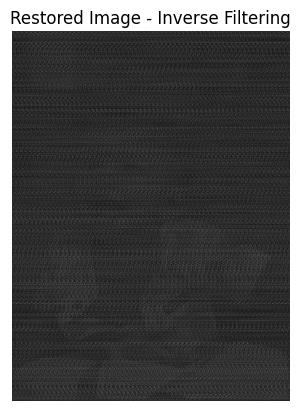

In [ ]:
#Inverse filtering is a frequency-domain technique to undo blur.
def inverse_filter(blurred_noisy, psf):
    eps = 1e-3  # small constant to avoid divide-by-zero

    #Convert Image to Frequency Domain
    G = fft2(blurred_noisy)

    #Convert PSF to Frequency Domain:
    H = fft2(psf, s=blurred_noisy.shape)

    #Implements the core idea of inverse filtering
    F_hat = G / (H + eps)
    restored = np.abs(ifft2(F_hat))
    return restored

#Restoration Process

restored_inverse = inverse_filter(blurred_noisy, psf)

plt.imshow(restored_inverse, cmap='gray')
plt.title("Restored Image - Inverse Filtering")
plt.axis('off')
plt.show()

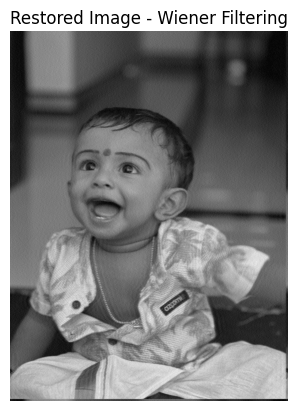

In [ ]:
def wiener_filter(blurred_noisy, psf, K=0.01):
    H = fft2(psf, s=blurred_noisy.shape)
    G = fft2(blurred_noisy)
    H_conj = np.conj(H)
    F_hat = (H_conj / (H * H_conj + K)) * G
    restored = np.abs(ifft2(F_hat))
    return restored

restored_wiener = wiener_filter(blurred_noisy, psf)

plt.imshow(restored_wiener, cmap='gray')
plt.title("Restored Image - Wiener Filtering")
plt.axis('off')
plt.show()

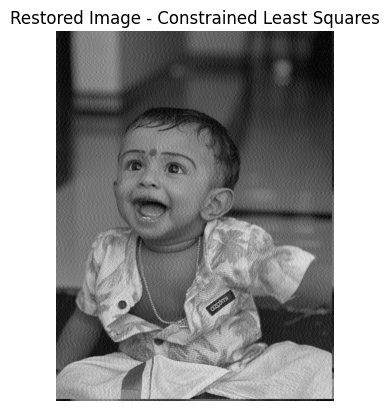

In [ ]:
def cls_filter(blurred_noisy, psf, gamma=0.001):
    H = fft2(psf, s=blurred_noisy.shape)
    G = fft2(blurred_noisy)

    # Laplacian operator (regularization term)
    P = np.array([[0, -1, 0],
                  [-1, 4, -1],
                  [0, -1, 0]])
    P_padded = np.zeros_like(blurred_noisy)
    P_padded[:3, :3] = P
    P_fft = fft2(P_padded)

    H_conj = np.conj(H)
    F_hat = (H_conj / (H_conj * H + gamma * (P_fft * np.conj(P_fft)))) * G
    restored = np.abs(ifft2(F_hat))
    return restored

restored_cls = cls_filter(blurred_noisy, psf)

plt.imshow(restored_cls, cmap='gray')
plt.title("Restored Image - Constrained Least Squares")
plt.axis('off')
plt.show()

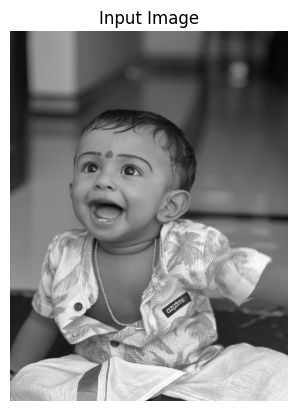

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read and convert to grayscale
img = cv2.imread('/content/hydu mund (2).jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Normalize and add Gaussian noise
img_normalized = img.astype(float) / 255.0
noise = np.random.normal(0, 0.02, img_normalized.shape)
noisy_img = img_normalized + noise


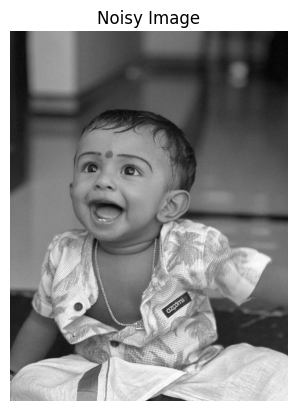

In [ ]:
# Clip to valid range [0,1]
noisy_img = np.clip(noisy_img, 0, 1)

plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.show()

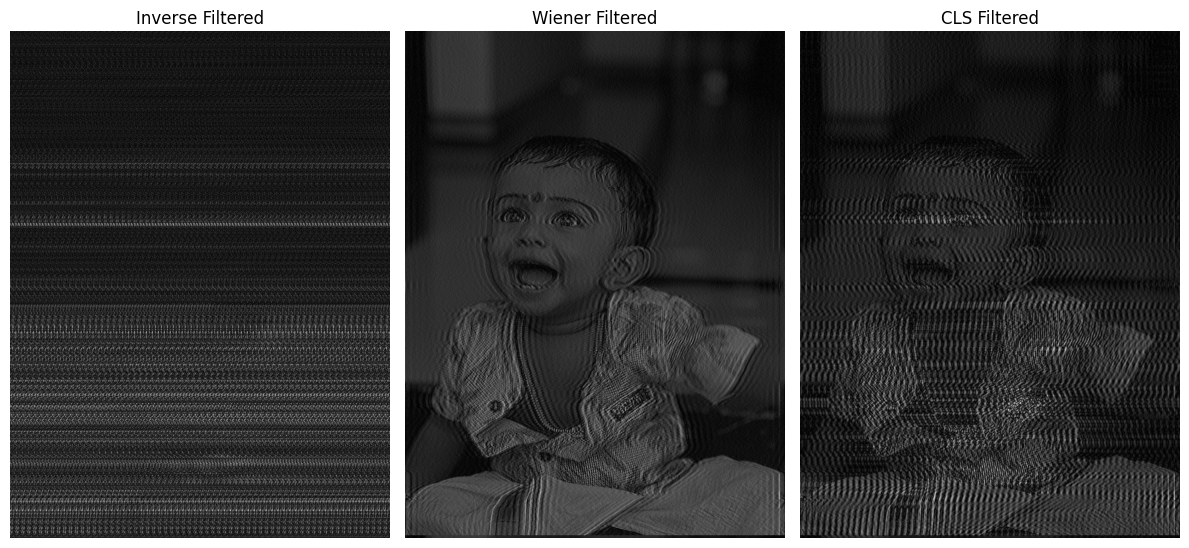

In [ ]:
import numpy as np
from scipy.signal import convolve2d
from scipy.fft import fft2, ifft2
import matplotlib.pyplot as plt

# Create motion blur PSF
def motion_blur_psf(length=15):
    psf = np.zeros((length, length))
    psf[int(length/2), :] = np.ones(length)
    psf = psf / psf.sum()
    return psf

psf = motion_blur_psf(15)

# ---- Define Filters ----
def inverse_filter(noisy_img, psf):
    eps = 1e-3
    G = fft2(noisy_img)
    H = fft2(psf, s=noisy_img.shape)
    F_hat = G / (H + eps)
    restored = np.abs(ifft2(F_hat))
    return restored

def wiener_filter(noisy_img, psf, K=0.01):
    H = fft2(psf, s=noisy_img.shape)
    G = fft2(noisy_img)
    H_conj = np.conj(H)
    F_hat = (H_conj / (H_conj * H + K)) * G
    restored = np.abs(ifft2(F_hat))
    return restored

def cls_filter(noisy_img, psf, gamma=0.001):
    H = fft2(psf, s=noisy_img.shape)
    G = fft2(noisy_img)

    P = np.array([[0, -1, 0],
                  [-1, 4, -1],
                  [0, -1, 0]])
    P_padded = np.zeros_like(noisy_img)
    P_padded[:3, :3] = P
    P_fft = fft2(P_padded)

    H_conj = np.conj(H)
    F_hat = (H_conj / (H_conj * H + gamma * (P_fft * np.conj(P_fft)))) * G
    restored = np.abs(ifft2(F_hat))
    return restored

# ---- Apply Filters ----
restored_inverse = inverse_filter(noisy_img, psf)
restored_wiener = wiener_filter(noisy_img, psf)
restored_cls = cls_filter(noisy_img, psf)

# ---- Display Results ----
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Inverse Filtered")
plt.imshow(restored_inverse, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Wiener Filtered")
plt.imshow(restored_wiener, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("CLS Filtered")
plt.imshow(restored_cls, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Function to calculate MSE
def mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

# Assuming images are normalized to [0,1]
# original image
img_normalized = img.astype(float) / 255.0

# Calculate MSE for each filtered output
mse_inverse = mse(img_normalized, restored_inverse)
mse_wiener = mse(img_normalized, restored_wiener)
mse_cls = mse(img_normalized, restored_cls)

print("MSE - Inverse Filtering:", mse_inverse)
print("MSE - Wiener Filtering:", mse_wiener)
print("MSE - CLS Filtering:", mse_cls)

MSE - Inverse Filtering: 21.14638621358444
MSE - Wiener Filtering: 0.029881683711751924
MSE - CLS Filtering: 0.11112306656401304
